In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import os 
os.getcwd()

'C:\\Users\\ksvg7\\Desktop\\PGA44\\ML\\Random Forest\\Class_Notes'

In [7]:
df=pd.read_csv(r"C:\Users\ksvg7\Desktop\PGA44\ML\Random Forest\Class_Notes\card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# DATA EXPLORATION

In [9]:
df.shape

(1000000, 8)

In [11]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [13]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [17]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [19]:
df.isnull().sum().sum()

0

# STATISTICAL SUMMARY

In [22]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.drop_duplicates(inplace=True)

In [26]:
X=df.drop("fraud",axis=1)
Y=df.fraud

In [28]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [30]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

# Train Test Split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=67)

In [35]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
132077,10.300001,21.751674,1.924213,1.0,0.0,1.0,1.0
986514,3.934436,4.999654,0.547605,1.0,0.0,0.0,1.0
258855,17.211245,1.276152,0.612160,1.0,1.0,0.0,1.0
397218,5.390956,0.050580,0.789219,1.0,0.0,0.0,1.0
711409,7.725661,0.174878,1.010581,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
436231,0.875985,3.910241,1.767302,0.0,0.0,0.0,1.0
777669,0.742738,0.493485,0.165711,0.0,0.0,1.0,1.0
919242,8.702135,1.092579,1.164404,1.0,1.0,0.0,0.0
873269,0.794370,0.511634,0.140699,0.0,0.0,0.0,0.0


In [37]:
x_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
475293,0.214794,0.666869,5.105725,0.0,1.0,0.0,1.0
521320,12.619516,2.690881,0.733371,1.0,0.0,0.0,0.0
408830,5.953235,1.037117,1.863291,1.0,0.0,0.0,1.0
885481,15.775973,1.081244,4.517466,1.0,1.0,0.0,1.0
643091,116.304448,2.950719,0.160365,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
170862,20.069494,0.078494,0.747275,1.0,1.0,0.0,1.0
970207,4.986959,3.147349,1.823555,1.0,0.0,0.0,1.0
381437,25.272704,0.204612,0.205026,1.0,0.0,0.0,1.0
100084,3.926971,9.143668,0.609239,1.0,0.0,0.0,0.0


In [39]:
x_train.shape

(750000, 7)

In [41]:
x_test.shape

(250000, 7)

# Train Random Forest Model

In [51]:
model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=None,     
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1           
)

model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [53]:
y_pred=model.predict(x_test)

# Model Evaluation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluation
print("📊 Train Performance")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

print("\n📊 Test Performance")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

print("\n✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))


📊 Train Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    684526
         1.0       1.00      1.00      1.00     65474

    accuracy                           1.00    750000
   macro avg       1.00      1.00      1.00    750000
weighted avg       1.00      1.00      1.00    750000

Confusion Matrix:
 [[684526      0]
 [     0  65474]]

📊 Test Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228071
         1.0       1.00      1.00      1.00     21929

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000

Confusion Matrix:
 [[228071      0]
 [     4  21925]]

✅ Test Accuracy: 0.999984


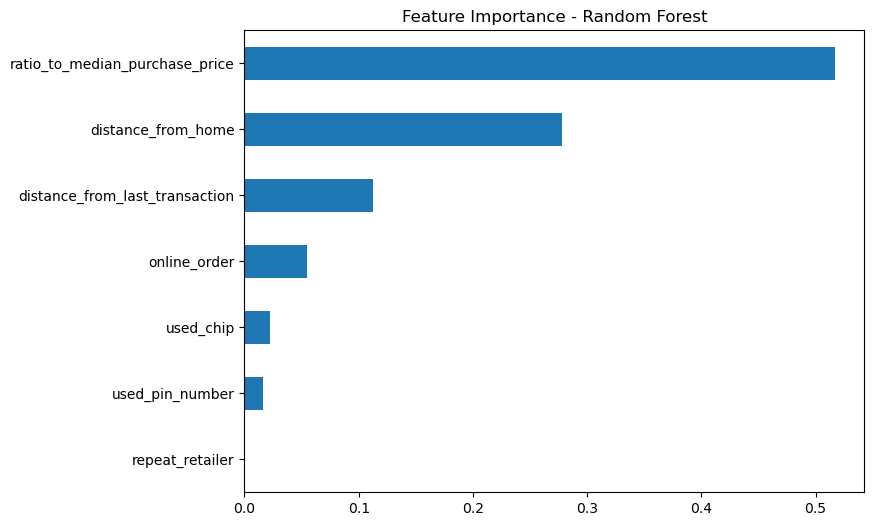

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.show()


In [63]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

### Here data balancing needs to be done

In [66]:
majority=df[df['fraud']==0]
minority=df[df['fraud']==1]

In [68]:
from sklearn.utils import resample
majority_downsample=resample(majority,n_samples=len(minority),random_state=96,replace=False)

In [70]:
balanced_data=pd.concat([majority_downsample,minority])

In [72]:
balanced_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
441443,3.345043,1.001111,0.418076,1.0,1.0,0.0,0.0,0.0
65139,1.805687,0.366900,0.759786,0.0,1.0,0.0,0.0,0.0
682830,3.649598,1.086802,0.324942,1.0,1.0,1.0,0.0,0.0
756513,8.424472,14.573211,1.027774,1.0,0.0,0.0,1.0,0.0
625236,34.553220,0.882612,0.690832,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [74]:
balanced_data["fraud"].value_counts()

fraud
0.0    87403
1.0    87403
Name: count, dtype: int64

In [77]:
x=balanced_data.drop(['fraud'],axis=1)
y=balanced_data['fraud']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67)

In [81]:
model=RandomForestClassifier(n_estimators=21)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=21)

In [82]:
y_pred=model.predict(x_test)

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17552
         1.0       1.00      1.00      1.00     17410

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



# Decision Tree

In [89]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=model.predict(x_test)

In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17555
         1.0       1.00      1.00      1.00     17407

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



### Hyperparameter Tunning

In [111]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

search.fit(x_train, y_train)
print("Best Params:", search.best_params_)
best_rf = search.best_estimator_


Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


# Evaluate Best Model on Train & Test Data

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Train Performance
print("📊 Train Performance")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Test Performance
print("\n📊 Test Performance")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))


📊 Train Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     69848
         1.0       1.00      1.00      1.00     69996

    accuracy                           1.00    139844
   macro avg       1.00      1.00      1.00    139844
weighted avg       1.00      1.00      1.00    139844

Confusion Matrix:
 [[69848     0]
 [    0 69996]]
Accuracy: 1.0

📊 Test Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17555
         1.0       1.00      1.00      1.00     17407

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

Confusion Matrix:
 [[17552     3]
 [    2 17405]]
Accuracy: 0.9998569875865225


# Feature Importance

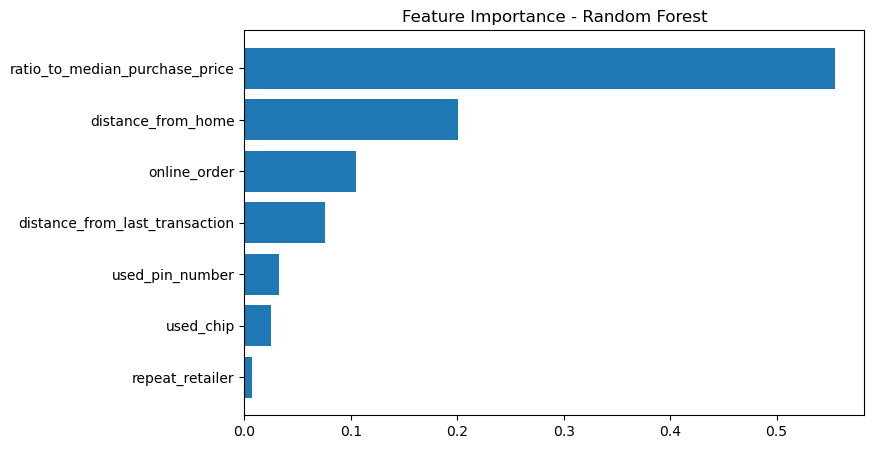

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = x_train.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()


In [124]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1_macro')
print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())


ValueError: Found input variables with inconsistent numbers of samples: [1000000, 174806]